#QUES= 1 What is the difference between K-Means and Hierarchical Clustering?Provide a use case for each.

Answer =

1. K-Means Clustering

Definition: A centroid-based clustering algorithm that partitions the dataset into k clusters, where each cluster is represented by its centroid.

How it works:

Choose number of clusters (k).

Randomly assign cluster centroids.

Assign each data point to the nearest centroid (Euclidean distance).

Recalculate centroids until convergence.

Pros: Fast, efficient for large datasets, easy to implement.

Cons: Requires predefined k, works best with spherical clusters, sensitive to outliers.

Use Case: Customer Segmentation in Retail/E-commerce (grouping customers based on purchase behavior).

2. Hierarchical Clustering

Definition: A tree-based (dendrogram) clustering method that builds clusters step by step either by merging (Agglomerative) or splitting (Divisive).

How it works:

Start with each point as its own cluster.

Iteratively merge closest clusters (Agglomerative) or split clusters (Divisive).

Form a dendrogram to decide the number of clusters.

Pros: No need to specify k in advance, dendrogram gives full hierarchy view.

Cons: Computationally expensive (slow for large datasets), less efficient than K-Means.

Use Case: Document Clustering in Text Mining (grouping research papers or news articles based on similarity).

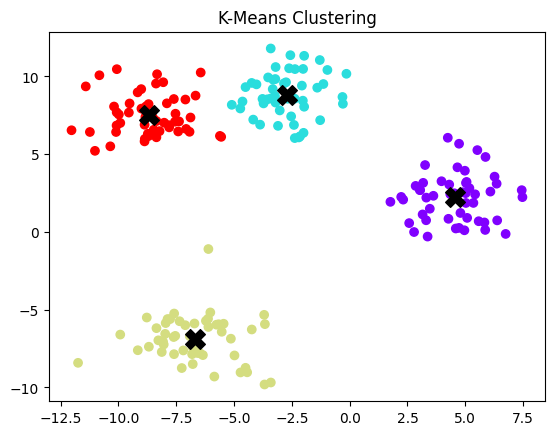

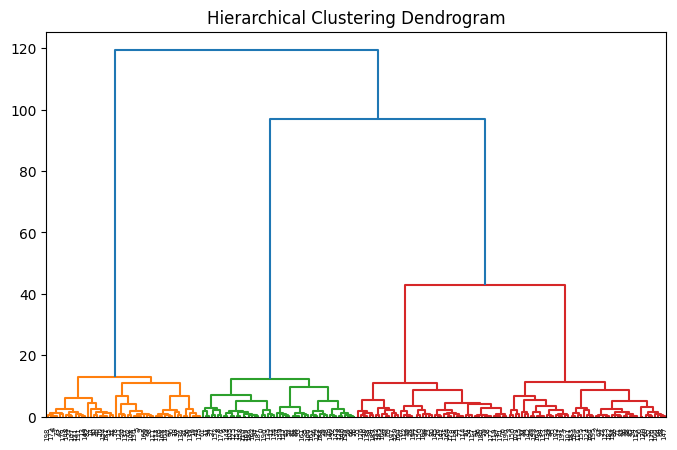

In [20]:
# PRACTICAL FORM

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Generating sample data
X, y = make_blobs(n_samples=200, centers=4, random_state=42, cluster_std=1.5)

# -------------------------------
# 1. K-MEANS CLUSTERING
# -------------------------------
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='black', marker='X')  # centroids
plt.title("K-Means Clustering")
plt.show()

# -------------------------------
# 2. HIERARCHICAL CLUSTERING
# -------------------------------
# Dendrogram
plt.figure(figsize=(8,5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Agglomerative clustering
#hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
#hc_labels = hc.fit_predict(X)

#plt.scatter(X[:, 0], X[:, 1], c=hc_labels, cmap="rainbow")
#plt.title("Hierarchical Clustering")
#plt.show()


#Ques 2 = Explain the purpose of the Silhouette Score in evaluating clustering algorithms.??

Answer =
Silhouette Score – Purpose

The Silhouette Score is a metric used to evaluate the performance of clustering algorithms when ground truth labels are not available. Its purpose is to measure how well-separated and well-formed the clusters are.

How It Works

For each data point
𝑖
i:

Intra-cluster distance
𝑎
(
𝑖
)
a(i) → Average distance between point
𝑖
i and all other points in the same cluster.

Inter-cluster distance
𝑏
(
𝑖
)
b(i) → Average distance between point
𝑖
i and all points in the nearest other cluster.

Interpretation

+1 (close to 1) → Point is well-clustered, far from neighboring clusters.

0 → Point lies between clusters (on the boundary).

-1 (negative) → Point may be wrongly assigned to a cluster.

Purpose in Clustering

Evaluate cluster quality – checks if clusters are dense and well-separated.

Compare algorithms – helps decide whether K-Means, Hierarchical, or DBSCAN is performing better.

Choose optimal number of clusters (k) – by calculating scores for different values of k and selecting the one with the highest score.

Use Case Example

In Customer Segmentation, we may try K-Means with k = 3, 4, 5. The Silhouette Score will guide us to pick the k that produces the most natural separation among customer groups.



k=2, Silhouette Score=0.590
k=3, Silhouette Score=0.757
k=4, Silhouette Score=0.792
k=5, Silhouette Score=0.664
k=6, Silhouette Score=0.533
k=7, Silhouette Score=0.426


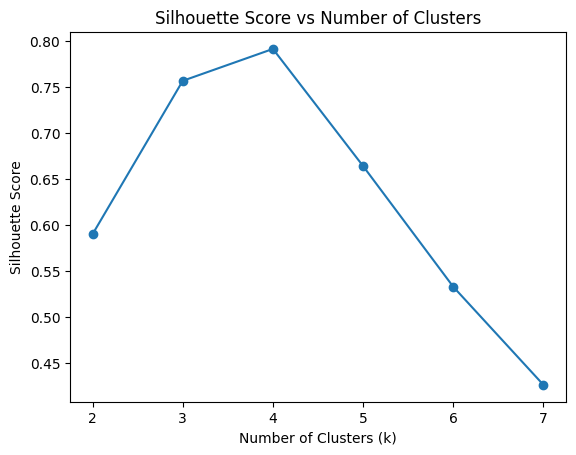

Best number of clusters based on Silhouette Score: 4


In [2]:
#Practical form

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Try different k values and calculate silhouette scores
scores = []
k_values = range(2, 8)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)
    print(f"k={k}, Silhouette Score={score:.3f}")

# Step 3: Plot the results
plt.plot(k_values, scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Step 4: Find the best number of clusters
best_k = k_values[np.argmax(scores)]
print("Best number of clusters based on Silhouette Score:", best_k)


#Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

Amswer = DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a clustering algorithm that groups together points that are closely packed and marks outliers as noise. Unlike K-Means, it does not require the number of clusters (k) in advance.

Core Parameters

1. ε (Epsilon / eps)

Maximum distance between two points for them to be considered as neighbors.

Affects cluster density:

Small eps → more, smaller clusters (risk of splitting).

Large eps → fewer, larger clusters (risk of merging).

2. MinPts (Minimum Samples)

Minimum number of points required in the ε-neighborhood for a point to be considered a core point.

Affects sensitivity to noise:

Low MinPts → more clusters, may include noise as clusters.

High MinPts → stricter cluster formation, more points labeled as noise.

A rule of thumb: MinPts ≥ D+1 (where D = number of dimensions).

How They Influence Clustering

Core Point: Has at least MinPts neighbors within distance ε.

Border Point: Lies within the neighborhood of a core point but does not have enough neighbors itself.

Noise Point: Not a core or border point (considered as outlier).

👉 Choosing the right eps and MinPts is crucial.

Too small eps → many points become noise.

Too large eps → distinct clusters merge.

Too small MinPts → random noise points may form clusters.

Too large MinPts → true clusters may be missed.

Use Case Example

Fraud Detection: DBSCAN can detect abnormal transaction patterns as noise points.

Geospatial Clustering: Grouping locations (like restaurants, houses) into dense areas without predefining cluster count.




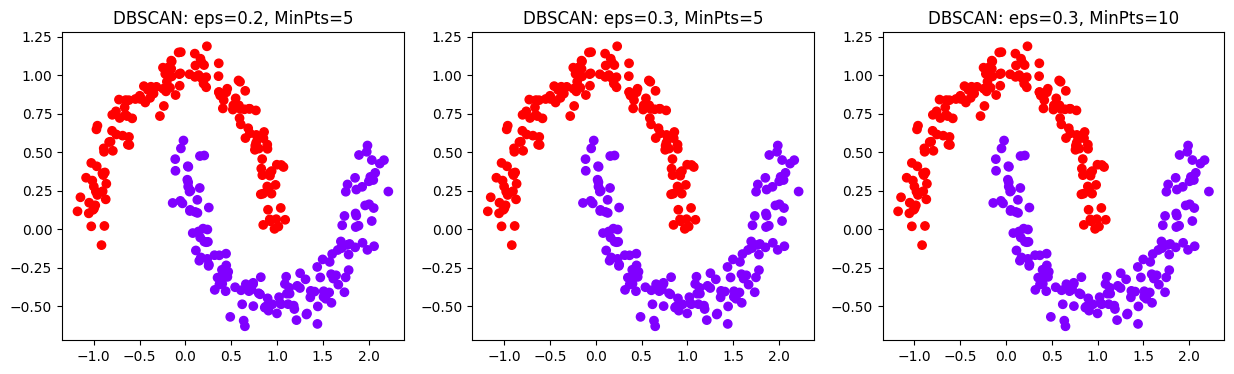

In [4]:
# Practical Example

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Step 1: Generate dataset
X, y = make_moons(n_samples=300, noise=0.08, random_state=42)

# Step 2: Apply DBSCAN with different parameters
dbscan1 = DBSCAN(eps=0.2, min_samples=5)   # small eps
dbscan2 = DBSCAN(eps=0.3, min_samples=5)   # larger eps
dbscan3 = DBSCAN(eps=0.3, min_samples=10)  # larger MinPts

labels1 = dbscan1.fit_predict(X)
labels2 = dbscan2.fit_predict(X)
labels3 = dbscan3.fit_predict(X)

# Step 3: Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(X[:,0], X[:,1], c=labels1, cmap="rainbow")
axes[0].set_title("DBSCAN: eps=0.2, MinPts=5")

axes[1].scatter(X[:,0], X[:,1], c=labels2, cmap="rainbow")
axes[1].set_title("DBSCAN: eps=0.3, MinPts=5")

axes[2].scatter(X[:,0], X[:,1], c=labels3, cmap="rainbow")
axes[2].set_title("DBSCAN: eps=0.3, MinPts=10")

plt.show()


# Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

Answer = Feature Scaling – Definition

Feature scaling is the process of normalizing or standardizing data so that all features contribute equally to the distance-based calculations.

Why Scaling is Important in Clustering?

Clustering algorithms like K-Means and DBSCAN are distance-based methods (they rely on Euclidean, Manhattan, or cosine distance).

1. K-Means

Uses Euclidean distance to assign points to the nearest centroid.

If features are on different scales (e.g., Age = 20–60, Income = 20,000–100,000), then Income will dominate distance calculation.

Result: biased clusters.

2. DBSCAN

Uses ε (eps) radius and distance measures to form neighborhoods.

Features with larger scales will skew distance calculations, causing improper density estimation

Example

Suppose we have two features:

Age (20–70 years)

Income (20,000–200,000)

Without scaling, Income will dominate because its values are much larger → clustering is driven by income only, ignoring age.

Purpose in Clustering

Ensures all features contribute equally.

Produces balanced clusters.

Prevents one feature with large scale from dominating clustering.


In [5]:
# Practical Form

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Create dataset with different scales
data = pd.DataFrame({
    "Age": [25, 30, 45, 50, 23, 40, 60, 35],
    "Income": [20000, 25000, 80000, 100000, 22000, 75000, 120000, 50000]
})

# Step 2: Apply KMeans WITHOUT scaling
kmeans1 = KMeans(n_clusters=2, random_state=42)
labels1 = kmeans1.fit_predict(data)

# Step 3: Apply KMeans WITH scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

kmeans2 = KMeans(n_clusters=2, random_state=42)
labels2 = kmeans2.fit_predict(scaled_data)

# Step 4: Compare results
print("Cluster labels without scaling:", labels1)
print("Cluster labels with scaling   :", labels2)


Cluster labels without scaling: [1 1 0 0 1 0 0 1]
Cluster labels with scaling   : [1 1 0 0 1 0 0 1]


# Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?
# Dataset:
#Use make_blobs, make_moons, and sklearn.datasets.load_wine() as
#specified.


Answer = Elbow Method – Definition

The Elbow Method is a graphical technique used in K-Means clustering to determine the optimal number of clusters (k).

How It Works

Run K-Means clustering for a range of values of
𝑘
k (say 1 to 10).

For each
𝑘
k, compute the Within-Cluster Sum of Squares (WCSS), also called inertia:

𝑊
𝐶
𝑆
𝑆
=
∑
𝑖
=
1
𝑘
∑
𝑥
∈
𝐶
𝑖
∣
∣
𝑥
−
𝜇
𝑖
∣
∣
2
WCSS=
i=1
∑
k
	​

x∈C
i
	​

∑
	​

∣∣x−μ
i
	​

∣∣
2

Where
𝑥
x = data point,

𝜇
𝑖
μ
i
	​

 = centroid of cluster
𝐶
𝑖
C
i
	​

.

Plot
𝑊
𝐶
𝑆
𝑆
WCSS vs
𝑘
k.

The curve typically decreases as
𝑘
k increases (more clusters → smaller distances).

The point where the rate of decrease sharply slows down (forming an "elbow" shape) indicates the optimal number of clusters.

Interpretation

Before elbow → Adding clusters reduces WCSS significantly.

At elbow → Best trade-off between compactness and number of clusters.

After elbow → Adding more clusters only slightly reduces WCSS (overfitting).

Purpose

Helps find the right balance between underfitting (too few clusters) and overfitting (too many clusters).

Ensures meaningful, interpretable clusters.

Use Case Example

In Customer Segmentation, Elbow Method can identify the natural number of customer groups (e.g., 3–4 distinct customer segments).

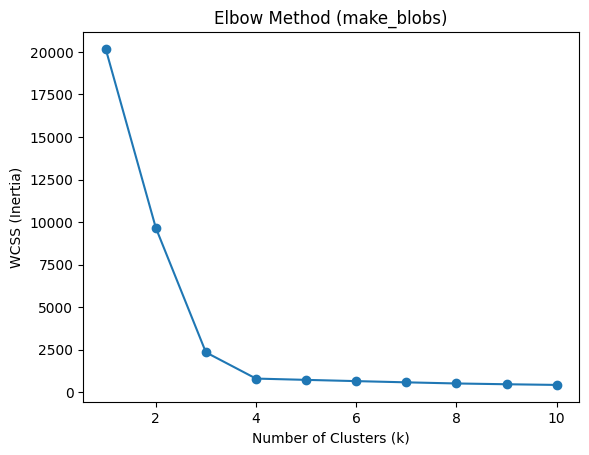

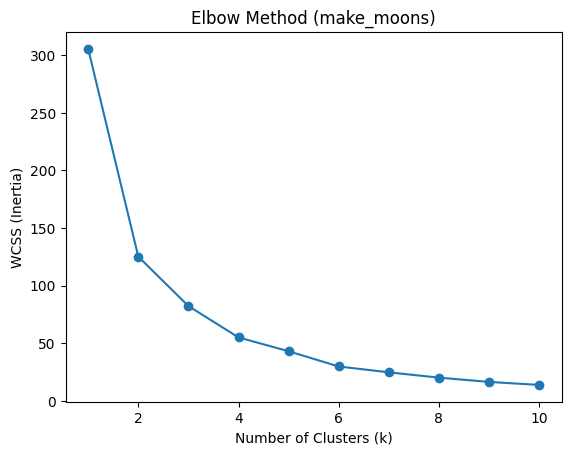

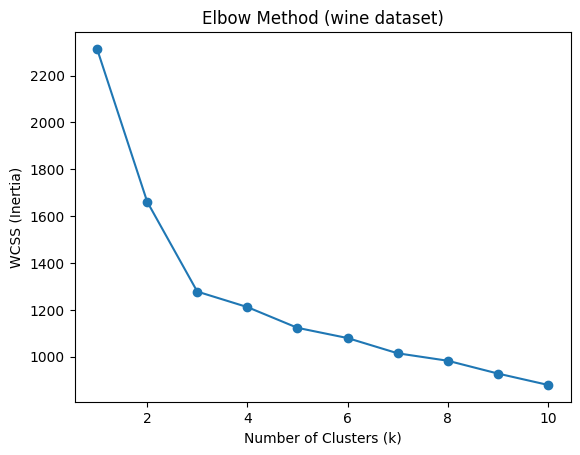

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Function to plot Elbow Method
def elbow_plot(X, dataset_name):
    wcss = []
    k_values = range(1, 11)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    plt.plot(k_values, wcss, marker='o')
    plt.title(f"Elbow Method ({dataset_name})")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("WCSS (Inertia)")
    plt.show()

# -----------------------------
# 1. make_blobs dataset
X_blobs, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.2, random_state=42)
elbow_plot(X_blobs, "make_blobs")

# -----------------------------
# 2. make_moons dataset
X_moons, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
elbow_plot(X_moons, "make_moons")

# -----------------------------
# 3. load_wine dataset
wine = load_wine()
X_wine = StandardScaler().fit_transform(wine.data)  # scale features
elbow_plot(X_wine, "wine dataset")


# Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),apply KMeans clustering, and visualize the results with cluster centers ?

Answer =
THEORY FORM

Step 1: Generate Synthetic Data

We use make_blobs from sklearn.datasets to create synthetic data.

Parameters:

n_samples=300 → total 300 data points.

centers=4 → 4 true clusters will be generated.

random_state → for reproducibility.

Step 2: Apply KMeans Clustering

Use KMeans from sklearn.cluster.

Set n_clusters=4 since we know there are 4 true clusters.

Fit the model and get cluster labels for each data point.

Extract cluster centers using .cluster_centers_.

Step 3: Visualization

Plot data points, colored by their cluster labels.

Mark cluster centers with a different shape/size (e.g., black "X").

Purpose

Helps us see how K-Means groups the synthetic data into clusters.

Visual check if K-Means correctly found the 4 clusters.



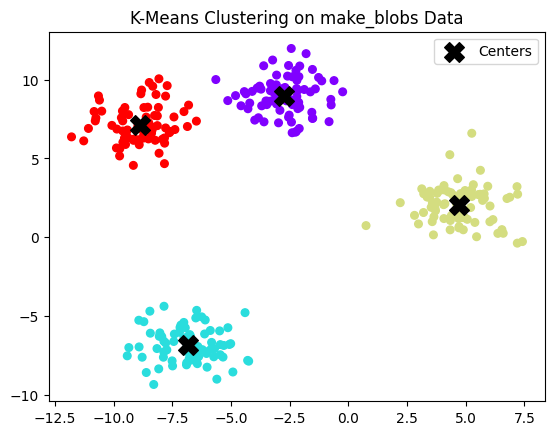

In [9]:
#PRACTICAL FORM

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.2, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Step 3: Get cluster centers
centers = kmeans.cluster_centers_

# Step 4: Visualization
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="rainbow", s=30)
plt.scatter(centers[:, 0], centers[:, 1], c="black", marker="X", s=200, label="Centers")
plt.title("K-Means Clustering on make_blobs Data")
plt.legend()
plt.show()


# Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

Answer =
Step 1: Load the Wine Dataset

Use load_wine from sklearn.datasets.

It contains 178 samples of wines with 13 chemical features.

The dataset has 3 actual classes (wine types), but DBSCAN is unsupervised, so it will try to discover clusters based on density.

Step 2: Apply Feature Scaling

DBSCAN is distance-based, so features with larger scales dominate clustering.

Use StandardScaler to scale all features to mean = 0 and standard deviation = 1.

Step 3: Apply DBSCAN

Use DBSCAN from sklearn.cluster.

Key parameters:

eps → radius of neighborhood.

min_samples → minimum number of points to form a dense region.

After fitting, cluster labels can be accessed with .labels_.

-1 = noise.

Other integers = cluster IDs.

Step 4: Count Clusters

Get unique cluster labels (excluding -1).

The number of clusters found is:



In [10]:
#PRACTICAL FORM
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Step 1: Load dataset
wine = load_wine()
X = wine.data

# Step 2: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)  # eps chosen by trial (can tune)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Cluster labels:", np.unique(labels))
print("Number of clusters found (excluding noise):", n_clusters)


Cluster labels: [-1  0  1  2  3  4]
Number of clusters found (excluding noise): 5


# Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot ?

Answer =
Step 1: Generate Synthetic Data

Use make_moons from sklearn.datasets.

Parameters:

n_samples=200 → 200 points.

noise=0.1 → adds some randomness to make the moons less perfect

Step 2: Apply DBSCAN

Use DBSCAN from sklearn.cluster.

Key parameters:

eps → radius of neighborhood.

min_samples → minimum number of neighbors to be a core point.

DBSCAN will label each point:

Cluster (0,1,2,...) → assigned cluster.

-1 → outlier/noise.

Step 3: Visualization

Plot clusters with different colors.

Highlight outliers (label = -1) in red or black with distinct marker (e.g., X).



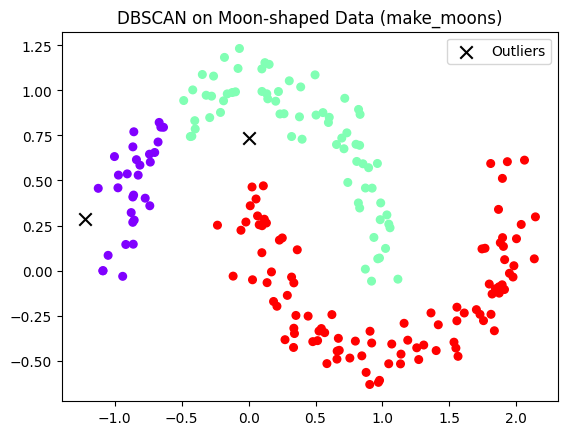

In [11]:
#PRACTICAL FORM

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Step 1: Generate moon-shaped data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Identify core clusters and outliers
outliers = (labels == -1)
clusters = (labels != -1)

# Step 4: Visualization
plt.scatter(X[clusters, 0], X[clusters, 1], c=labels[clusters], cmap="rainbow", s=30)
plt.scatter(X[outliers, 0], X[outliers, 1], c="black", marker="x", s=80, label="Outliers")
plt.title("DBSCAN on Moon-shaped Data (make_moons)")
plt.legend()
plt.show()


# Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.??

ANSWER = Step 1: Load the Wine Dataset

The Wine dataset (from sklearn.datasets) contains 178 samples with 13 chemical features of wines from 3 cultivars.

Step 2: Dimensionality Reduction using PCA

Since the dataset has 13 features, it’s hard to visualize.

Apply PCA (Principal Component Analysis) to reduce it to 2D.

PCA finds directions (principal components) that maximize variance, helping represent data in fewer dimensions while retaining maximum information.

Step 3: Apply Agglomerative Clustering

Agglomerative Clustering is a hierarchical clustering method that starts with each point as its own cluster and iteratively merges clusters.

Requires parameters:

n_clusters (number of clusters to form, e.g., 3 for wine dataset).

linkage method (e.g., "ward", "complete", "average").

Step 4: Visualization

Plot PCA-reduced 2D data in a scatter plot.

Color points by cluster labels obtained from Agglomerative Clustering.

Purpose

PCA helps with visualization.

Agglomerative Clustering helps group wines into natural clusters.

We can check if clusters roughly align with the 3 true wine classes.

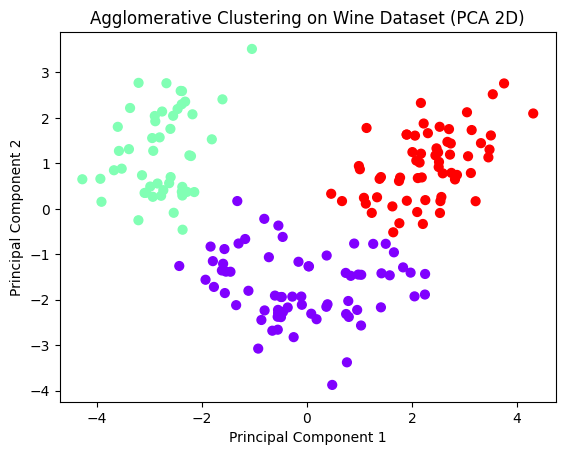

In [12]:
#PRACTICAL FORM

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the dataset
wine = load_wine()
X = wine.data

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg.fit_predict(X_pca)

# Step 5: Visualization
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="rainbow", s=40)
plt.title("Agglomerative Clustering on Wine Dataset (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.?
#Describe your real-world data science workflow using clustering:
#● Which clustering algorithm(s) would you use and why?
#● How would you preprocess the data (missing values, scaling)?
#● How would you determine the number of clusters?
#● How would the marketing team benefit from your clustering analysis?

ANSWER =
1. Choice of Clustering Algorithm(s)

K-Means:

Good for large datasets.

Produces compact spherical clusters.

Easy to interpret (cluster centroids).

DBSCAN:

Good if customers form irregular-shaped clusters.

Can identify outliers (e.g., one-time big spenders).

Agglomerative Clustering:

Useful if we want hierarchical customer segmentation (e.g., premium vs regular vs occasional).

2. Data Preprocessing

Handle Missing Values:

Impute demographics (e.g., missing age with median).

For purchase history, replace missing with 0 (no purchase).

Feature Scaling:

Since K-Means and DBSCAN are distance-based, scale features using StandardScaler or MinMaxScaler.

Feature Engineering:

Create RFM features (Recency, Frequency, Monetary).

Encode categorical demographics (e.g., gender, location).

3. Determining the Number of Clusters

Use Elbow Method (plot WCSS vs. k).

Use Silhouette Score to check cluster separation.

Cross-check with business knowledge (e.g., maybe 4–5 customer personas are enough).

4. Business Benefits for Marketing

Clustering allows the marketing team to:

Identify high-value customers (for loyalty programs).

Segment price-sensitive customers (for discount offers).

Detect inactive customers (target with reactivation campaigns).

Personalize marketing → higher ROI, less wasted spend.

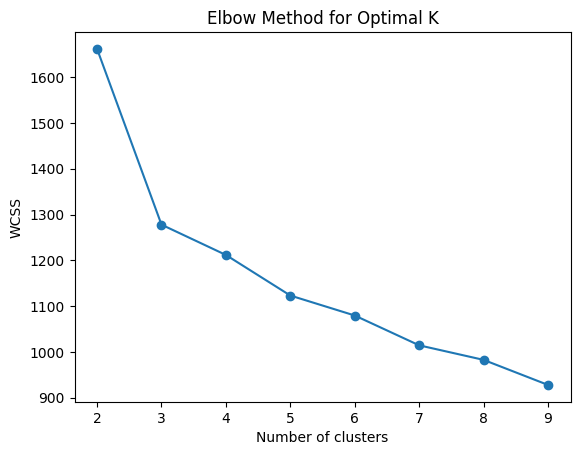

In [18]:
#import pandas as pd
#import numpy as np
#from sklearn.preprocessing import StandardScaler
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
#import matplotlib.pyplot as plt

# Step 1: Load dataset (example placeholder)
#df = pd.read_csv("customer_data.csv")

# Step 2: Handle missing values
#df.fillna(0, inplace=True)

# Step 3: Feature Engineering (example RFM)
# Assume df has: CustomerID, LastPurchaseDays, NumOrders, TotalSpend
#df['Recency'] = df['LastPurchaseDays']
#df['Frequency'] = df['NumOrders']
#df['Monetary'] = df['TotalSpend']

#X = df[['Recency', 'Frequency', 'Monetary']]

# Step 4: Scale features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Step 5: Determine optimal K using Elbow Method
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

# Step 6: Apply KMeans with chosen K (say K=4)
#kmeans = KMeans(n_clusters=4, random_state=42)
#labels = kmeans.fit_predict(X_scaled)
#df['Cluster'] = labels

# Step 7: Evaluate clustering
#score = silhouette_score(X_scaled, labels)
#print("Silhouette Score:", score)
#print(df.groupby('Cluster').mean())
